<a href="https://colab.research.google.com/github/dynasty-29/Kaggle-BIPOC-Program-Projects/blob/main/Heart_Disease_Prediction_A_Binary_Logistic_regression_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Prediction: A Binary Logistic regression case study**

# **Introduction**

Logistic regression is a supervised machine learning algorithm that is used to predict a binary outcome, such as whether an event will occur or not. It is based on the idea of finding a line of best fit that can be used to predict the probability of an event occurring, given the value of one or more predictor variables.

Logistic regression is commonly used in cases where there is a relationship between a predictor variable and a binary outcome. There as different types of Logistic regression: Binary, Multinomial and ordinal Logistic regression.


For this case study will be covering Binary Logistic regression by predicting the presence or absence of a heart disease. Binary logistic regression is a statistical model that is used to predict the probability of a binary outcome, such as the likelihood of an event occurring or not occurring. It is a type of logistic regression, which is a method used to predict a binary outcome based on one or more independent variables. In binary logistic regression, the outcome is either a success (represented by the value 1) or a failure (represented by the value 0). The model estimates the probability of the outcome occurring based on the values of the independent variables.

The data is obtained from [kaggle](https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction).

The Variables are:

Each attribute is a potential risk factor. There are both demographic, behavioural and medical risk factors.

a. Demographic: sex: male or female;(0,1)

    age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

b. Behavioural

    currentSmoker: whether or not the patient is a current smoker (Nominal)

    cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

c. Medical( history):

    BPMeds: whether or not the patient was on blood pressure medication (Nominal)

    prevalentStroke: whether or not the patient had previously had a stroke (Nominal)

    prevalentHyp: whether or not the patient was hypertensive (Nominal)

    diabetes: whether or not the patient had diabetes (Nominal)

d. Medical(current):

    totChol: total cholesterol level (Continuous)

    sysBP: systolic blood pressure (Continuous)

    diaBP: diastolic blood pressure (Continuous)

    BMI: Body Mass Index (Continuous)

    heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

    glucose: glucose level (Continuous)

e. Predict variable (desired target):

    10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)



The Main objective of the case study is to predict presence or absence of heart disease based on the variables given.

**Metrics for success:**

* Building a logistic regression model with an F1 score above 80%.
* Identifying the top factors influencing the Heart disease.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data
df = pd.read_csv('/content/Heart_Disease_Prediction.csv')

In [3]:
#data set shape
df.shape

(270, 14)

In [4]:
#previewing first 5 rows

df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


For EDA let's change back gender to female or male

In [5]:
df['Sex'] = df.Sex.map({0: 'Male', 1 : 'Female'})
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,Female,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,Male,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,Female,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,Female,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,Male,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [6]:
#Checking for nulls
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [7]:
#checking fot duplicates
df.duplicated().sum()

0

# **EDA**

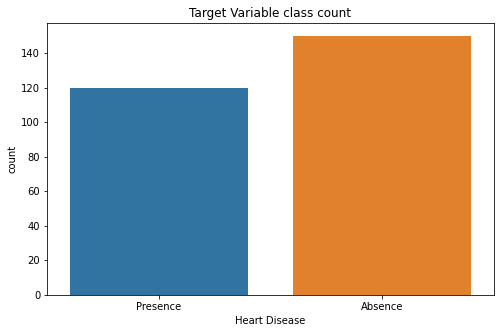

In [8]:
#checking if we have a class imbalance

fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(df['Heart Disease'], label = "Count", ax=ax).set(
    title="Target Variable class count") 
plt.show()

Those with heart disease are less than those without. However the difference isn't that large so will not be dealing with class imbalance.


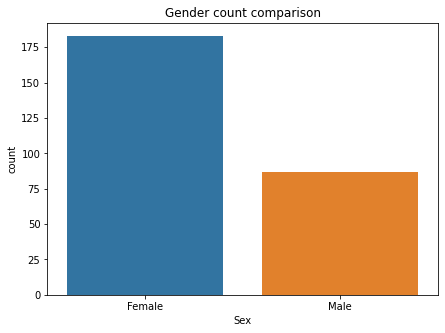

In [9]:
#checking Number of Male to Female from the data set

fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(df['Sex'], label = "Count", ax=ax).set(
    title="Gender count comparison") 
plt.show()

There were more females than males inthe data set

Text(0.5, 1, 'Distribution Across all  Attributes')

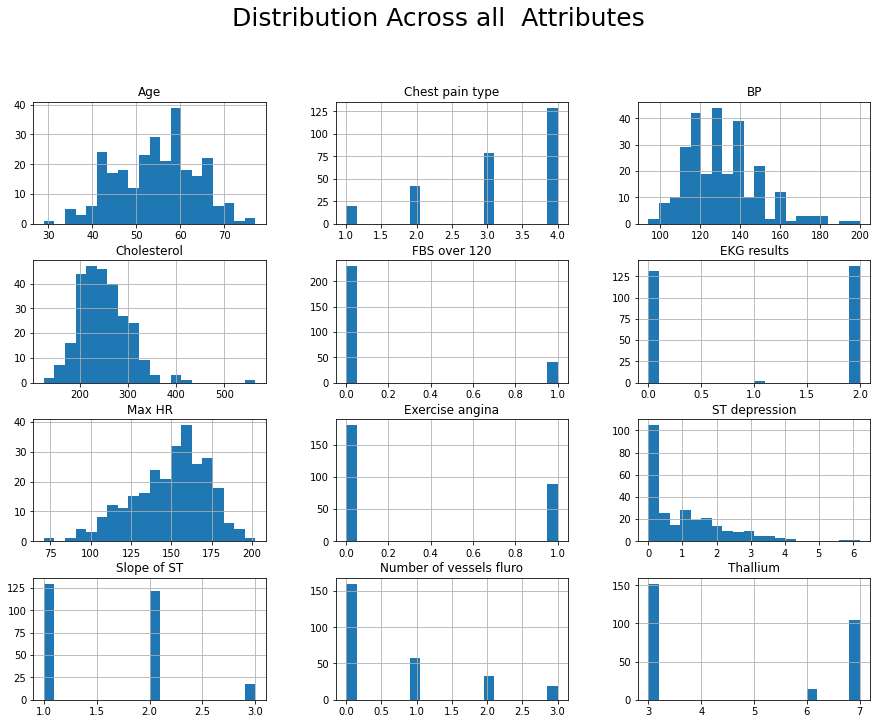

In [10]:
#Visual of the GDI_Value distribution
df.hist( bins=20, figsize = (15,11))
plt.suptitle( 'Distribution Across all  Attributes', fontsize= 25, y=1)

In [11]:
df.value_counts(['Sex', 'Heart Disease'])

Sex     Heart Disease
Female  Presence         100
        Absence           83
Male    Absence           67
        Presence          20
dtype: int64

There were more cases of heart disease among Males (25%) than females (5.5%) despite famles being more inthe survey

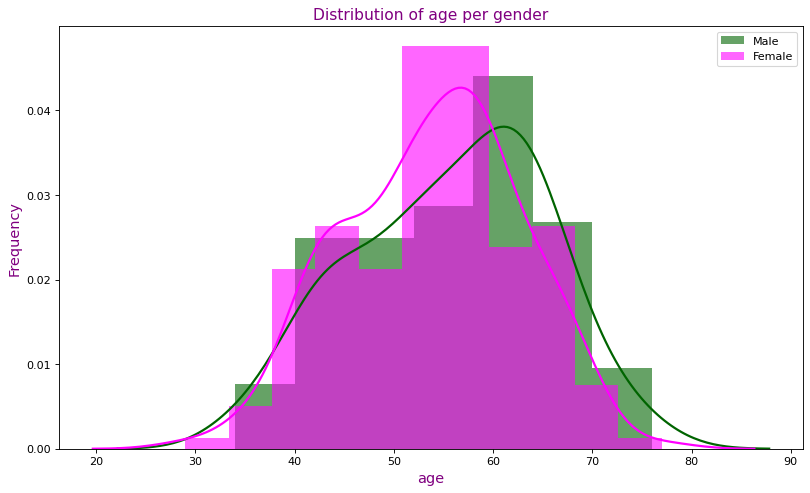

In [12]:
# Plotting histogram to show distribution of age per gender
# 
male = df.loc[df.Sex=='Male', 'Age']    # Selecting only male datapoints in the age column
female = df.loc[df.Sex=='Female', 'Age']  # Selecting only female datapoints in the age column

# Creating a dictionary containing opacaticy and line width in a dictionary for efficiency
#
dfg = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

# Plotting the histograms
#
plt.figure(figsize=(12,7), dpi= 80)
sns.distplot(male, color="darkgreen", label="Male", **dfg)
sns.distplot(female, color="fuchsia", label="Female", **dfg)
plt.title('Distribution of age per gender', fontsize = 14, color = 'purple')
plt.xlabel('age', fontsize = 13, color = 'purple')
plt.ylabel('Frequency', fontsize = 13, color = 'purple')
plt.legend()
plt.show()

Most participants were around age 40 to 70 years old.

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2
Slope of ST,270.0,1.585185,0.614390,1.0,1.0,2.0,2.0,3.0


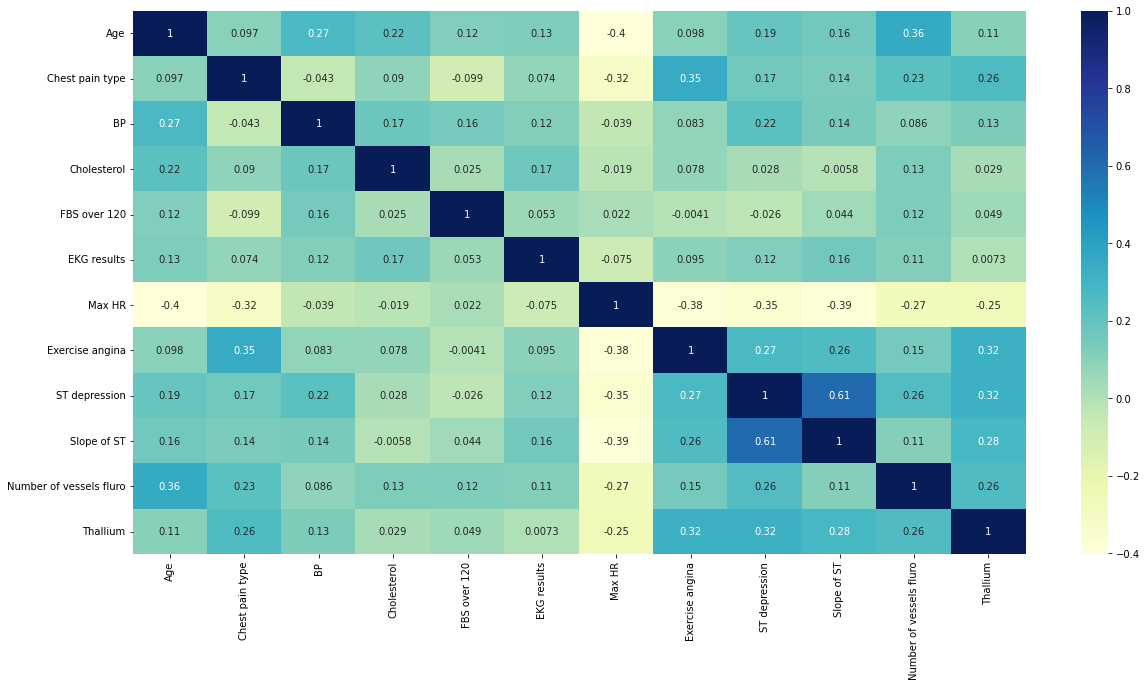

In [14]:
#checking variables correlates using a correlation map
#Correlation check
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Some variables with high correlation include:
 * Chest pains and Exerciseing ANgina. (one characteristic of Angina presentation is chest pain)
 * ST slope and depression go hand in hand with and without disease.
 * BP and age
 * Age and number of vessels fluroscence. 


In [16]:
df['Sex'] = df.Sex.map({'Male': 0, 'Female': 1})
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [17]:
df['Heart Disease'] = df['Heart Disease'].map({'Absence': 0, 'Presence': 1})
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [19]:
#checking most important features to Heart Disease
print("Most important features relative to Heart Disease")
corr = df.corr()
corr.sort_values(["Heart Disease"], ascending = False, inplace = True)
print(corr['Heart Disease'])


Most important features relative to Heart Disease
Heart Disease              1.000000
Thallium                   0.525020
Number of vessels fluro    0.455336
Exercise angina            0.419303
ST depression              0.417967
Chest pain type            0.417436
Slope of ST                0.337616
Sex                        0.297721
Age                        0.212322
EKG results                0.182091
BP                         0.155383
Cholesterol                0.118021
FBS over 120              -0.016319
Max HR                    -0.418514
Name: Heart Disease, dtype: float64


# **Modeling**



In [20]:
# from sklearn.model_selection import KFold
import scipy as sp
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression

In [21]:
#First we separate our target variable from our predictor variables
X = df.drop(['Heart Disease'], axis=1)

y = df['Heart Disease']

In [22]:
# Splitting dataset to train and test sets 80% train and 20% test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

Most of feature scaling done in logistic regression are the same as those in linear regression which can be referenced [here](https://medium.com/@DynastyG/house-price-prediction-a-linear-regression-case-study-91ebf06b1e6e).


In [23]:
#scaled features

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)


In [24]:
# Fitting our model

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [25]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

Model Evaluation

For Logistic regression we use a confusion matrix rather than other for of regression model evaluation.

A confusion matrix, also known as an error matrix, is a summarized table used to assess the performance of a classification model. The number of correct and incorrect predictions are summarized with count values and broken down by each class. We normally have the following to eavluate:

*Accuracy

This is simply equal to the proportion of predictions that the model classified correctly.

* Precision

Precision is also known as positive predictive value and is the proportion of relevant instances among the retrieved instances. In other words, it answers the question “What proportion of positive identifications was actually correct?”

* Recall

Recall, also known as the sensitivity, hit rate, or the true positive rate (TPR), is the proportion of the total amount of relevant instances that were actually retrieved. It answers the question “What proportion of actual positives was identified correctly?”



* Specificity

Specificity, also known as the true negative rate (TNR), measures the proportion of actual negatives that are correctly identified as such. It is the opposite of recall.

* F1 Score

The F1 score is a measure of a test’s accuracy — it is the harmonic mean of precision and recall. It can have a maximum score of 1 (perfect precision and recall) and a minimum of 0. Overall, it is a measure of the preciseness and robustness of your model.

In [26]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[26,  4],
       [ 5, 19]])

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 83.33333333333334 %


Our model is able to give us an 83% accuracy with no tuned parameters.

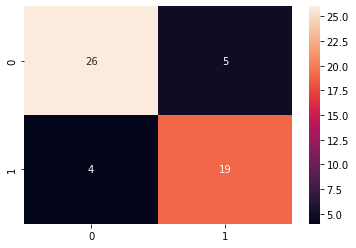

In [29]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        30
           1       0.83      0.79      0.81        24

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54



We can also compare our model accuracy to f1-score (which is prefered to accuracy) and we get 85%.